# Affordable Housing in Spain: A Detailed Examination by Property Type (2019)

## Table of Contents

- [Introduction](#introduction)
- [Objectives](#objectives)
- [Data Source and Structure](#data-source-and-structure)
  - [Dataset Variables](#dataset-variables)
- [Data Collection and Preprocessing](#data-collection-and-preprocessing)
  - [Import Necessary Libraries](#import-necessary-libraries)
  - [Function Declarations](#function-declarations)
  - [Data Import and Initial Exploration](#data-import-and-initial-exploration)
- [Data Transformation](#data-transformation)
  - [Data Filtering](#data-filtering)
  - [Data Deduplication](#data-deduplication)
  - [Handling Missing Data](#handling-missing-data)
  - [Individual Variable Analysis for Data Cleaning](#individual-variable-analysis-for-data-cleaning)
  - [Data derivation](#data-derivation)
  - [Saving the Cleaned Data](#saving-the-cleaned-data)
  - [Geolocalization](#geolocalization)
  - [Saving Geolocalized Data](#saving-geolocalized-data)
  - [Coordinate Fluctuation (Jittering)](#coordinate-fluctuation-jittering)
  - [Post-Geolocation Data Cleaning](#post-geolocation-data-cleaning)
  - [Handling Outliers](#handling-outliers)
  - [Saving the dataframe ready for statistical analysis](#saving-the-dataframe-ready-for-statistical-analysis)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
  
  




## Introduction

The family housing market in Spain reached approximately €165.79 billion in 2023 and is expected to grow at a compound annual rate of 5.8%, reaching around €276.69 billion by 2032. These figures highlight the importance and expansion of this sector in the Spanish economy.

Understanding regional particularities is crucial for buyers, sellers, and investors, as it provides valuable insights into the factors influencing prices and regional variations. This work aims to analyze apartments and family houses to offer valuable support to stakeholders, helping them make informed decisions in this evolving market.

## Objectives

The primary goal of this project is to perform a statistical analysis of apartments and family houses for sale in various Spanish provinces during 2019. The analysis will employ geolocation techniques and data visualization tools such as Tableau. The aim is to provide a detailed understanding of the characteristics and spatial distribution of the Spanish housing market during this period. Given the target audience of U.S. investors and private buyers, terminology will be adapted to align with their context. The study aims to achieve the following objectives:

- Clean and explore the data to ensure accuracy and reliability.
- Use geolocation techniques to convert property addresses into geographic coordinates.
- Calculate and summarize key statistical measures for property prices and characteristics.
- Visualize the geographic distribution and identify regional price differences.
- Analyze correlations between property features and their prices.
- Apply clustering techniques to identify patterns and segment the real estate market.
- Perform hypothesis testing to compare prices across different regions and assess the impact of specific features.
- Develop and validate linear regression models to predict property prices.
- Design and build an interactive Tableau dashboard for dynamic data exploration.
- Present key findings from the data analysis and provide practical recommendations based on the insights gained.


## Data Source and Structure

The dataset used in this project was sourced from Kaggle: [Spanish Housing Dataset](https://www.kaggle.com/datasets/thedevastator/spanish-housing-dataset-location-size-price-and/data) 

Was originally collected through web scraping from the [Idealista S.A.U.](https://www.idealista.com/) by github user [trueuoc](https://github.com/trueuoc) and published under the license: [CC0 1.0 Universal (CC0 1.0) - Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/legalcode.en)

It contains key variables that describe real estate listings, including property details (e.g., price, size, condition), location (e.g., city, district), and amenities (e.g., air conditioning, garden, pool). The data is structured with clear identifiers and includes both categorical and numerical variables, allowing for robust analysis.

### Dataset Variables

- **ad_description**: Property listing description.
- **ad_last_update**: Date of the last listing update.
- **air_conditioner**: Whether the property has air conditioning (0: No, 1: Yes).
- **balcony**: Whether the property has a balcony (0: No, 1: Yes).
- **bath_num**: Number of bathrooms in the property.
- **built_in_wardrobe**: Whether the property has built-in wardrobes (0: No, 1: Yes).
- **chimney**: Whether the property has a chimney (0: No, 1: Yes).
- **condition**: Condition of the property (e.g., second-hand/good condition).
- **construct_date**: Year of construction of the property.
- **energetic_certif**: Property’s energy certification.
- **floor**: Floor on which the property is located.
- **garage**: Indicates whether it has a garage space.
- **garden**: Whether the property has a garden (0: No, 1: Yes).
- **ground_size**: Size of the property's land.
- **heating**: Whether the property has heating (0: No, 1: Yes).
- **house_id**: A unique property ID number.
- **house_type**: Type of housing.
- **kitchen**: Whether the property has a kitchen.
- **lift**: Whether the property has an elevator (0: No, 1: Yes).
- **loc_city**: City where the property is located.
- **loc_district**: District.
- **loc_full**: Full address of the property.
- **loc_neigh**: Neighborhood.
- **loc_street**: Street.
- **loc_zone**: Zone.
- **m2_real**: Actual square meters of the property.
- **m2_useful**: Usable square meters.
- **obtention_date**: Date when the data was collected.
- **orientation**: Property's orientation.
- **price**: Property price.
- **reduce_mobility**: Whether the house is adapted for people with reduced mobility.
- **room_num**: Number of rooms in the property.
- **storage_room**: Whether the property has a storage room (0: No, 1: Yes).
- **swimming_pool**: Whether the property has a swimming pool (0: No, 1: Yes).
- **terrace**: Whether the property has a terrace (0: No, 1: Yes).
- **unfurnished**: Whether the property is unfurnished.
- **number_of_companies_prov**: Number of companies in the province.
- **population_prov**: Population of the province.
- **companies_prov_vs_national_%**: Percentage of companies in the province compared to the national total.
- **population_prov_vs_national_%**: Percentage of the population in the province compared to the national total.
- **renta_media_prov**: Average income in the province.

## Data Collection and Preprocessing

### Import Necessary Libraries

**Modules**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gc
from scripts.functions import *

**Pandas Settings**

In [2]:
# Set Pandas to Display All Columns
pd.set_option('display.max_columns', None)

#### scripts.functions documentation

**Funtions:**

- **filterdf**(df, col1, val1, col2, val2): Generates a dataframe filtered by two variables.
- **binary_categorical_view**(dataframe): Visualizes binary categorical variables: `air_conditioner`, `chimney`, `garden`, `storage_room`, `swimming_pool`, `terrace`.
- **categorical_features_view**(dataframe): Visualizes categorical variables: `room_num`, `bath_num`, `condition`.
- **boxplot_view**(dataframe, column): Visualizes a specific column.
- **boxplot_view_wo**(dataframe, column): Visualizes a specific column without displaying outliers.
- **distribution_views**(dataframe): Visualizes histograms for the variables: `m2_real`, `price`.
- **boxplot_with_mean**(dataframe, group_col, target_col, show_outliers, figsize): Displays boxplots of a variable grouped by another variable's values.
- **plot_histogram**(df, column, bins=20, kde=True, figsize=(10, 6), xlim=None): Displays a histogram of a variable, which can be segmented.
- **plot_distribution_by_price_segment**(df): Groups data by price segment and type of property, generating a heatmap.

### Data Import and Initial Exploration

In [4]:
raw_data = pd.read_csv('data/source/spanish_houses.csv')

In [5]:
raw_data.head().T

,0,1,2,3,4
ad_description,Precio chalet individual en la localidad de Ab...,"Atico de 80m2, para entrar a vivir, con salón ...",B/ Etxaguen. Casa de reciente construcción con...,Se vende vivienda en abornikano (ayuntamiento ...,Negociables.
ad_last_update,Anuncio actualizado el 27 de marzo,más de 5 meses sin actualizar,más de 5 meses sin actualizar,más de 5 meses sin actualizar,más de 5 meses sin actualizar
air_conditioner,0,0,0,0,0
balcony,0,0,0,1,0
bath_num,2,2,3,1,1
built_in_wardrobe,0,0,0,1,0
chimney,0,0,0,1,0
condition,segunda mano/buen estado,segunda mano/buen estado,segunda mano/buen estado,segunda mano/buen estado,segunda mano/buen estado
construct_date,NaN,2006.0,NaN,NaN,NaN
energetic_certif,NaN,no indicado,no indicado,en trámite,no indicado


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ad_description                 95426 non-null   object 
 1   ad_last_update                 100000 non-null  object 
 2   air_conditioner                100000 non-null  object 
 3   balcony                        100000 non-null  object 
 4   bath_num                       100000 non-null  object 
 5   built_in_wardrobe              100000 non-null  object 
 6   chimney                        100000 non-null  object 
 7   condition                      86059 non-null   object 
 8   construct_date                 32059 non-null   object 
 9   energetic_certif               74691 non-null   object 
 10  floor                          79693 non-null   object 
 11  garage                         40811 non-null   object 
 12  garden                         

The dataset consists of **100,000 entries** and **41 columns**. The data types include `object`, `float64`, and `int64`. Several columns contain missing values. The dataset occupies **31.3 MB** in memory, making it manageable for analysis. This initial exploration highlights the need for data cleaning, especially in columns with a high proportion of missing values.

## Data Transformation

### Data Filtering
Remove the variables that will not be used in this analysis.

In [7]:
raw_data.drop(columns=['ad_description', 
                       'ad_last_update', 
                       'house_id', 
                       'obtention_date', 
                       'unfurnished',
                       'number_of_companies_prov', 
                       'population_prov', 
                       'companies_prov_vs_national_%', 
                       'population_prov_vs_national_%',
                       'renta_media_prov',
                       'energetic_certif',
                       'loc_district',
                       'floor',
                       'reduced_mobility',
                       'balcony',
                       'built_in_wardrobe'], inplace=True)

### Data Deduplication
Detect and remove duplicate rows.

In [8]:
duplicated_rows = raw_data[raw_data.duplicated(keep='first')]
print(f'The dataset has {duplicated_rows.shape[0]} duplicate rows')

The dataset has 6071 duplicate rows


In [9]:
#Remove duplicate rows while keeping the first occurrence
raw_data.drop_duplicates(inplace=True)

#Verifying
verify_duplicated = raw_data[raw_data.duplicated(keep=False)]
print(verify_duplicated)

Empty DataFrame
Columns: [air_conditioner, bath_num, chimney, condition, construct_date, garage, garden, ground_size, heating, house_type, kitchen, lift, loc_city, loc_full, loc_neigh, loc_street, loc_zone, m2_real, m2_useful, orientation, price, room_num, storage_room, swimming_pool, terrace]
Index: []


### Handling Missing Data

In [10]:
# Missing data sorted.
missing_values = raw_data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

ground_size       93928
kitchen           91902
loc_street        80147
heating           69857
construct_date    63150
orientation       56789
garage            56130
loc_neigh         52086
m2_useful         44501
lift              38965
condition         13295
dtype: int64


Many variables in the dataset contain a significant amount of missing data. Upon closer investigation, it is possible that these are **structural missing values** in categorical variables and should be replaced with 0. This adjustment will be further analyzed in the following sections.

Other variables with a large amount of missing data **(more than 60%)** that should have values in all records will be removed from the dataset.

In [11]:
raw_data.drop(columns=['ground_size', 
                       'kitchen', 
                       'loc_street', 
                       'heating',
                       'construct_date',
                       'orientation',
                       'loc_neigh',
                       'm2_useful',
                       'lift'], inplace=True)

### Individual Variable Analysis for Data Cleaning

#### condition

In [12]:
raw_data['condition'].value_counts()

condition
segunda mano/buen estado      67899
segunda mano/para reformar    10457
promoción de obra nueva        2277
condition                         1
Name: count, dtype: int64

In [13]:
raw_data[raw_data['condition'] == 'condition']

,air_conditioner,bath_num,chimney,condition,garage,garden,house_type,loc_city,loc_full,loc_zone,m2_real,price,room_num,storage_room,swimming_pool,terrace
4248,air_conditioner,bath_num,chimney,condition,garage,garden,house_type,loc_city,loc_full,loc_zone,m2_real,price,room_num,storage_room,swimming_pool,terrace


A value equal to the header was detected, likely due to a row left over after removing duplicates. This row probably originates from instances where column names were repeated at regular intervals in the dataframe. It will be removed.

In [14]:
raw_data.drop(raw_data[raw_data['condition'] == 'condition'].index, inplace=True)

With 13,319 missing records in this variable, we deduce that the data were not recorded because they were irrelevant to buyers. This suggests that the properties are neither newly constructed nor in need of renovation, so it can be inferred that they are second-hand homes. The values will be renamed according to the terminology used in the U.S. real estate market.

In [15]:
raw_data['condition'] = raw_data['condition'].fillna('Resale')
raw_data['condition'] = raw_data['condition'].replace({
    'segunda mano/buen estado': 'Resale', 
    'segunda mano/para reformar': 'Fixer-upper', 
    'promoción de obra nueva':'New'
    })

In [16]:
# Verifying
raw_data['condition'].unique()

array(['Resale', 'Fixer-upper', 'New'], dtype=object)

#### garage

In [22]:
unique_garage = raw_data['garage'].unique()
unique_garage[:5]

array(['plaza de garaje incluida en el precio', nan,
       'plaza de garaje por 15.000 eur adicionales',
       'plaza de garaje por 12.500 eur adicionales',
       'plaza de garaje por 23.000 eur adicionales'], dtype=object)

The variable contains 3 types of values:
- 'NaN'
- 'plaza de garaje incluida en el precio'
- 'plaza de garaje por "x" eur adicionales'

The variable values are changed to:
- NaN to `Not Included`.
- 'plaza de garaje incluida en el precio' to `Included`.
- All occurrences of 'plaza de garaje por...' to `Separate Purchase`.

In [23]:
raw_data['garage'] = raw_data['garage'].fillna('Not Included')
raw_data['garage'] = raw_data['garage'].replace('plaza de garaje incluida en el precio', 'Included')
raw_data['garage'] = raw_data['garage'].replace(to_replace = r'^plaza de garaje por.*', value='Separate Purchase', regex=True)

In [24]:
# Verifiying ..
raw_data['garage'].unique()

array(['Included', 'Not Included', 'Separate Purchase'], dtype=object)

#### Verify the missing values

In [25]:
missing_values = raw_data.isnull().sum().sort_values(ascending=False)
print(missing_values)

air_conditioner    0
bath_num           0
chimney            0
condition          0
garage             0
garden             0
house_type         0
loc_city           0
loc_full           0
loc_zone           0
m2_real            0
price              0
room_num           0
storage_room       0
swimming_pool      0
terrace            0
dtype: int64


#### air_conditioner

In [17]:
raw_data['air_conditioner'].value_counts()

air_conditioner
0    71158
1    22770
Name: count, dtype: int64

#### swimming_pool

In [18]:
raw_data['swimming_pool'].value_counts()

swimming_pool
0    76108
1    17820
Name: count, dtype: int64

#### storage_room

In [19]:
raw_data['storage_room'].value_counts()

storage_room
0    55859
1    38069
Name: count, dtype: int64

#### garden

In [35]:
raw_data['garden'].value_counts()

garden
0    65545
1    25784
Name: count, dtype: int64

#### terrace

In [40]:
raw_data['terrace'].value_counts()

terrace
0    47215
1    44114
Name: count, dtype: int64

#### room_num

In [26]:
raw_data['room_num'].unique()

array(['4', '3', '2', '7', '5', '1', '8', '13', 'sin habitación', '6',
       '9', '10', '15', '12', '30', '18', '35', '17', '14', '11', '16',
       '36', '84', '20', '22', '65', '24', '23', '32', '25', '34', '26',
       '56', '58', '73'], dtype=object)

In [27]:
# Replace the value 'sin habitacion' with '0'
raw_data['room_num'] = raw_data['room_num'].replace('sin habitación', '0')

In [28]:
# Convert the variable to the correct data type
raw_data['room_num'] = pd.to_numeric(raw_data['room_num'])
# Verifying
raw_data['room_num'].dtype

dtype('int64')

#### price

In [29]:
# Convert the variable to the correct data type
raw_data['price'] = raw_data['price'].astype(float)
raw_data['price'].dtype

dtype('float64')

#### m2_real

In [30]:
# Convert the variable to the correct data type
raw_data['m2_real'] = pd.to_numeric(raw_data['m2_real'])
# verifying
raw_data['m2_real'].dtype

dtype('int64')

#### house_type

In [31]:
raw_data['house_type'].value_counts()

house_type
Piso                                       50206
 Casa o chalet independiente               13032
 Casa o chalet                              6411
 Chalet adosado                             5937
Ático                                       3261
 Casa de pueblo                             2977
Dúplex                                      2384
 Chalet pareado                             2304
 Finca rústica                              2254
Alquiler de Piso                            2232
 Casa rural                                  925
Estudio                                      678
Casa rural                                   571
 Caserón                                     147
Alquiler de Ático                            101
 Masía                                       100
Alquiler de Dúplex                            72
 Casa terrera                                 68
Alquiler de Casa o chalet independiente       61
Alquiler de Chalet adosado                    54
 Cortijo 

Remove records referring to rentals

In [32]:
pattern = r'^Alquiler.*'
alquiler_rows = raw_data[raw_data['house_type'].str.contains(pattern, regex=True)]
raw_data.drop(alquiler_rows.index, inplace=True)

In [33]:
# Remove spaces before and after strings
raw_data['house_type'] = raw_data['house_type'].str.strip()
# verifying
raw_data['house_type'].value_counts()

house_type
Piso                           50206
Casa o chalet independiente    13032
Casa o chalet                   6411
Chalet adosado                  5937
Ático                           3261
Casa de pueblo                  2977
Dúplex                          2384
Chalet pareado                  2304
Finca rústica                   2254
Casa rural                      1496
Estudio                          678
Caserón                          147
Masía                            100
Casa terrera                      68
Cortijo                           30
Palacio                           18
Torre                             18
Castillo                           8
Name: count, dtype: int64

Change values to U.S. real estate market terminology:

- **Piso**: Apartment
- **Casa o chalet independiente**: Single-Family Home
- **Casa o chalet**: Single-Family Home
- **Chalet adosado**: Townhouse
- **Ático** : Penthouse
- **Casa de pueblo**: Cottage
- **Dúplex**: Duplex
- **Chalet pareado**: Semi-Detached House
- **Finca rústica**: Farmhouse
- **Casa rural**: Rural House
- **Estudio**: Studio Apartment
- **Caserón**: Mansion
- **Masía**: Country House
- **Casa terrera**: Bungalow
- **Cortijo**: Ranch House
- **Torre**: Tower House
- **Palacio** : Palace
- **Castillo** : Castle

In [34]:
house_type_dict = {
    'Piso': 'Apartment',
    'Casa o chalet independiente': 'Single-Family Home',
    'Casa o chalet': 'Single-Family Home',
    'Chalet adosado': 'Townhouse',
    'Ático': 'Apartment',
    'Casa de pueblo': 'Cottage',
    'Dúplex': 'Duplex',
    'Chalet pareado': 'Semi-Detached House',
    'Finca rústica': 'Farmhouse',
    'Casa rural': 'Rural House',
    'Estudio': 'Studio Apartment',
    'Caserón': 'Mansion',
    'Masía': 'Country House',
    'Casa terrera': 'Bungalow',
    'Cortijo': 'Ranch House',
    'Torre': 'Tower House',
    'Palacio': 'Palace',
    'Castillo': 'Castle'
}
raw_data['house_type'] = raw_data['house_type'].map(house_type_dict)
# Verifying
raw_data['house_type'].value_counts()

house_type
Apartment              53467
Single-Family Home     19443
Townhouse               5937
Cottage                 2977
Duplex                  2384
Semi-Detached House     2304
Farmhouse               2254
Rural House             1496
Studio Apartment         678
Mansion                  147
Country House            100
Bungalow                  68
Ranch House               30
Palace                    18
Tower House               18
Castle                     8
Name: count, dtype: int64

#### bath_num

In [36]:
raw_data['bath_num'].value_counts().sort_values(ascending=False)

bath_num
2            37095
1            34080
3            12044
4             4559
5             1661
6              690
sin baños      635
7              255
8              115
9               60
10              43
11              23
13              17
12              14
14              10
15               9
20               4
18               3
17               2
16               2
34               1
84               1
23               1
19               1
32               1
30               1
58               1
75               1
Name: count, dtype: int64

In [39]:
raw_data['bath_num'] = raw_data['bath_num'].replace('sin baños', '0')
# Verifying
raw_data['bath_num'].unique()

array(['2', '3', '1', '4', '7', '6', '15', '5', '0', '8', '10', '34',
       '11', '9', '14', '12', '13', '20', '84', '16', '19', '23', '32',
       '18', '17', '30', '58', '75'], dtype=object)

#### loc_full

In [41]:
raw_data['loc_full'].head()

0              La iglesia , Urcabustaiz , Zuya, Álava 
1     la Union Plazatxoa, 8 , Legutiano , Zuya, Álava 
2          Calle Etxaguen s/n , Aramaio , Zuya, Álava 
3       CP 01449, 1449 CP , Urcabustaiz , Zuya, Álava 
4     Calle Nueva Plaza, 9 , Urcabustaiz , Zuya, Ál...
Name: loc_full, dtype: object

Remove the word 'Calle' to normalize addresses in preparation for geocoding

In [42]:
raw_data['loc_full'] = raw_data['loc_full'].str.replace(r'\b[Cc]alle\b', '', regex=True)
# Verifiying
raw_data['loc_full'].head()

0              La iglesia , Urcabustaiz , Zuya, Álava 
1     la Union Plazatxoa, 8 , Legutiano , Zuya, Álava 
2                Etxaguen s/n , Aramaio , Zuya, Álava 
3       CP 01449, 1449 CP , Urcabustaiz , Zuya, Álava 
4          Nueva Plaza, 9 , Urcabustaiz , Zuya, Álava 
Name: loc_full, dtype: object

### Data derivation

To obtain coordinates and a well-constructed complete address, the geolocator requires the street, number, and city. If any information is inaccurate, it returns `None`. In cases where a record contains incorrect data and cannot be geolocated, we will attempt to use fewer details, such as the city and municipality. The geolocator will then return the coordinates of the city. Examples:

The incorrect initial content is removed, leaving the remaining data (city and province):
- **CP 01449, 1449 CP, Urcabustaiz, Zuya, Álava**: `None`
- **Urcabustaiz, Zuya, Álava**: Urkabustaiz, Gorbeialdea, Araba/Álava, Euskadi, Spain, (42.9709057, -2.9186291298186964).

For this case, we create a new column by combining the `loc_city` and `loc_zone` variables to use this data when it is not possible to geolocate using the `loc_full` variable.

In [43]:
raw_data['city_prov'] = raw_data['loc_city'].str.cat(raw_data['loc_zone'], sep=', ')
raw_data['city_prov'].head()

0    Urcabustaiz, Zuya, Álava
1      Legutiano, Zuya, Álava
2        Aramaio, Zuya, Álava
3    Urcabustaiz, Zuya, Álava
4    Urcabustaiz, Zuya, Álava
Name: city_prov, dtype: object

Remove the `loc_city` and `loc_zone` variables from the dataframe.

In [44]:
raw_data = raw_data.drop(columns=['loc_city', 'loc_zone'])

### Saving the Cleaned Data

#### Validating Data Before Saving

In [49]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91329 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   air_conditioner  91329 non-null  int64  
 1   bath_num         91329 non-null  int64  
 2   chimney          91329 non-null  int64  
 3   condition        91329 non-null  object 
 4   garage           91329 non-null  object 
 5   garden           91329 non-null  int64  
 6   house_type       91329 non-null  object 
 7   loc_full         91329 non-null  object 
 8   m2_real          91329 non-null  int64  
 9   price            91329 non-null  float64
 10  room_num         91329 non-null  int64  
 11  storage_room     91329 non-null  int64  
 12  swimming_pool    91329 non-null  int64  
 13  terrace          91329 non-null  int64  
 14  city_prov        91329 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 11.1+ MB


Some numerical variables were converted to object type due to mixed data types within the same column and how the data was loaded from the CSV file. The following function corrects this issue and assigns the correct data type to each column.

In [48]:
# List of columns to convert from object to numeric if possible
columns_to_convert = ['air_conditioner', 'bath_num', 'chimney', 'garden',
                      'storage_room', 'swimming_pool', 'terrace']

# Apply pd.to_numeric() to each column.
for column in columns_to_convert:
    raw_data[column] = pd.to_numeric(raw_data[column])

# Verifying the data types after conversion
print(raw_data.dtypes)

air_conditioner      int64
bath_num             int64
chimney              int64
condition           object
garage              object
garden               int64
house_type          object
loc_full            object
m2_real              int64
price              float64
room_num             int64
storage_room         int64
swimming_pool        int64
terrace              int64
city_prov           object
dtype: object


In [52]:
# raw_data.to_csv('data/clean_data.csv', index=False)
del raw_data
gc.collect()

1448

### Geolocalization

---

**This section is only documented due to the time required to run geocoding. The functions and code segments used are shown.**

---

#### Obtain the full address, region, province, city, and coordinates through geolocation and integration of external data.

For this process, we use the **geopy** library, a Python client for several popular geocoding web services. To have this library available, we need to install it via **pip** in the Bash terminal or directly in a Jupyter Notebook cell.

```python
    pip install geopy
```

Import the geocoder to be used; in this case, we will use **Nominatim**, an Open Source geolocator that utilizes OpenStreetMap.

```python
    # Import libraries
    import requests
    import time

    # Import the geocoder
    from geopy.geocoders import Nominatim

    # Error handling
    from geopy.exc import GeocoderTimedOut, GeocoderServiceError
```

#### Split the dataframe into chunks to optimize memory and execution time.

Given the file’s size, geolocating all entries at once would be inefficient and could lead to memory issues and very high processing time. To mitigate this, the file is **divided into chunks of 10,000 rows**. The create_chunks function is designed to split the DataFrame, save each chunk to disk, and generate a list of the file names.

```python
    def create_chunks(df, chunksize, directory):
        file_names = []
        chunk_number = 0

        # Iterar sobre el DataFrame en trozos de tamaño específico
        for start in range(0, len(df), chunksize):
            chunk_number += 1
            chunk = df[start:start + chunksize]
            # Guardar el chunk en un archivo CSV
            file_name = f'{directory}/dataframe_{chunk_number}.csv'
            chunk.to_csv(file_name, index=False)
            file_names.append(file_name)
            # Liberar memoria
            del chunk
            gc.collect()

        return file_names
```

#### Declare variables and execute functions

```python
    # Output directory
    directory = 'data/'

    # Input File
    df = pd.read_csv('data/clean_dataframe.csv')

    # Chunks Size
    chunksize = 10000

    chunks_files = create_chunks(input_csv, chunksize, directory)
    print(chunks_files)
```

#### Obtaining Latitude and Longitude

The **geolocate** function takes the full address from the `loc_full` variable, attempts to geocode it, and returns the latitude and longitude. If there is an issue, it will try with the `city_prov` variable, which only includes the city and province. It will return `None` if neither of the two variables is successful. Between each iteration with the geolocator, it will wait for 1 second, which is the minimum time for each request with this geolocator. The function includes:

- A loop to retry geolocation up to a maximum number of retries.
- A 10-second timeout for each geolocation attempt, as set in the **geopy** configuration.
- Error handling that includes a `time.sleep` with a `backoff_factor` to increase the wait time between retries.

```python
    def geolocate(row, geolocator, retries=retries, backoff_factor=backoff_factor, timeout=timeout):
        address = row['loc_full']
        address_2 = row['city_prov']
        
        for attempt in range(retries):
            try:
                location = geolocator.geocode(address, timeout=timeout)
                if not location:
                    time.sleep(1)
                    location = geolocator.geocode(address_2, timeout=timeout)
                
                if location:
                    return pd.Series([location.latitude, location.longitude, location.address])
                else:
                    return pd.Series([None, None, None])
            except (GeocoderTimedOut, GeocoderServiceError) as e:
                print(f"Error geocoding {address} or {address_2}: {e}")
                time.sleep(backoff_factor * (2 ** attempt))
        return pd.Series([None, None, None])
```

The **split_address** function extracts the `postal code`, `region`, and `municipality` from the address provided by the geolocation.

```python
    def split_address(df, address_col):
        df = df.copy()   
        p_codes = []
        regions = []
        municipalities = []

        for address in df[address_col]:
            if address:
                parts = address.split(', ')
                if len(parts) >= 3:
                    possible_p_code = parts[-2]
                    
                    if len(possible_p_code) == 5 and possible_p_code.isdigit():
                        p_code = possible_p_code
                        region = parts[-3]
                        municipality = parts[-4]
                    else:
                        p_code = None
                        region = parts[-2]
                        municipality = parts[-3]
                else:
                    p_code = None
                    region = None
                    municipality = None
            else:
                p_code = None
                region = None
                municipality = None

            p_codes.append(p_code)
            regions.append(region)
            municipalities.append(municipality)
        
        df['p_code'] = p_codes
        df['region'] = regions
        df['municipality'] = municipalities
        
        return df
```

The **process_chunk** function generates the new data columns created with **geolocate** and **split_address** function and adds them to the section of the dataframe being processed, then saves it to a CSV file. It then frees the created dataframe from memory and forces garbage collection. This method ensures that the memory used by the dataframe is released after saving, helping to maintain efficient memory usage when processing large volumes of data.

```python
    def process_chunk(chunk_file, directory, geolocator):
    df_chunk = pd.read_csv(chunk_file)
    location_data = []
    
    for idx, row in df_chunk.iterrows():
        location_data.append(geolocate(row, geolocator))
        time.sleep(1)  
    df_chunk[['latitude', 'longitude', 'address']] = pd.DataFrame(location_data)
    df_chunk = split_address(df_chunk, 'address')
    
    # Save dataframe
    processed_file_name = f'{directory}/processed_{chunk_file.split("/")[-1]}'
    df_chunk.to_csv(processed_file_name, index=False)
    
    # Free memory
    del df_chunk
    gc.collect()
    
    return processed_file_name

```

#### Define Variables and Execute Functions

```python
    # Define geolocator
    geolocator = Nominatim(user_agent="spanish_houses")

    # Funtions parameters
    retries = 3
    backoff_factor = 0.3
    timeout = 10

    # Define variables
    directory = 'data/chunks/'

    # Execute functions to obtain Latitude and Longitude
    process_chunk('data/chunks/dataframe_1.csv', directory, geolocator)
    process_chunk('data/chunks/dataframe_2.csv', directory, geolocator)
    ...
```

---

**End of Documented Section**

---

### Saving Geolocalized Data

In [5]:
processed_files = ['data/chunks/processed_dataframe_1.csv',
                   'data/chunks/processed_dataframe_2.csv',
                   'data/chunks/processed_dataframe_3.csv',
                   'data/chunks/processed_dataframe_4.csv',
                   'data/chunks/processed_dataframe_5.csv',
                   'data/chunks/processed_dataframe_6.csv',
                   'data/chunks/processed_dataframe_7.csv',
                   'data/chunks/processed_dataframe_8.csv',
                   'data/chunks/processed_dataframe_9.csv',
                   'data/chunks/processed_dataframe_10.csv']

dataframes = [pd.read_csv(file) for file in processed_files]
processed_dataframe = pd.concat(dataframes, ignore_index=True)

# Save the dataframe
# processed_dataframe.to_csv('data/processed_dataframe.csv', index=False)

### Coordinate Fluctuation (Jittering)

**Jittering** is a technique used to slightly disperse points that have identical or very similar coordinates, making data visualization and analysis easier. To perform Jittering, a small amount of random noise is added to the coordinates of each point to disperse them slightly. The **move_coordinates** function moves the coordinates by a random angle and distance provided by the **disperse_coordinates** function. This random angle and distance are converted into latitude and longitude degrees, which are then added to the original coordinates. In this way, multiple properties with the same coordinates will be separated by different distances and angles from the original point. One disadvantage of using this technique is that when the location is near the coast, it may result in locations appearing over the sea.

The **disperse_coordinates** function first groups all the duplicate coordinates and applies the **move_coordinates** function to each line with a different angle and distance value within the ranges specified in the parameters.

In our project, properties that share the same coordinates are because:
- In the case of buildings.
- if the address was not in the correct format, the geolocation function used the 'city_prov' variable, geolocating only the city.
- It is also common to find properties for sale that do not display their exact address and instead share a common address. This is a strategy used by real estate agents known as **blind listing**. In this strategy, the exact location of the property is not publicly disclosed to protect the seller's information and prevent other agents or potential buyers from contacting the owner directly without going through the agent handling the sale.

In [4]:
def move_coordinates(lat, lon, distance, angle):
    """
    Moves the coordinates by a specified distance and angle.
    The distance is given in meters and the angle in degrees.
    """
    # Radius of the earth in meters.
    R = 6378137.0
    
    # Convert distance from meters to degrees.
    delta_lat = distance / R
    delta_lon = distance / (R * np.cos(np.pi * lat / 180))

    # Convert the angle to radians.
    theta = np.radians(angle)

    new_lat = lat + delta_lat * np.sin(theta) * (180 / np.pi)
    new_lon = lon + delta_lon * np.cos(theta) * (180 / np.pi)

    return new_lat, new_lon

def disperse_coordinates(df, lat_col='latitude', lon_col='longitude', min_distance=10, max_distance=100):
    """
    Randomly disperse coordinates.
    """
    counts = df.groupby([lat_col, lon_col]).size().reset_index(name='counts')
    duplicates = counts[counts['counts'] > 1]
    
    for _, row in duplicates.iterrows():
        lat = row[lat_col]
        lon = row[lon_col]
        count = int(row['counts']) 
        
        angles = np.random.uniform(0, 360, count)
        distances = np.random.uniform(min_distance, max_distance, count)
        
        idx = df[(df[lat_col] == lat) & (df[lon_col] == lon)].index
        for i, angle, distance in zip(idx, angles, distances):
            new_lat, new_lon = move_coordinates(lat, lon, distance, angle)
            df.at[i, lat_col] = float(new_lat)
            df.at[i, lon_col] = float(new_lon)
    
    return df

In [5]:
# Load the processed dataframe
processed_data = pd.read_csv('data/processed_dataframe.csv')

In [6]:
# Define parameters.
lat_col='latitude'
lon_col='longitude'
min_distance = 100
max_distance = 150

In [7]:
# Perform the Jittering
processed_data = disperse_coordinates(processed_data, lat_col, lon_col, min_distance, max_distance)

### Post-Geolocation Data Cleaning

#### Checking for Null Values

In [8]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89948 entries, 0 to 89947
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   air_conditioner  89948 non-null  int64  
 1   bath_num         89948 non-null  int64  
 2   chimney          89948 non-null  int64  
 3   condition        89948 non-null  object 
 4   garage           89948 non-null  object 
 5   garden           89948 non-null  int64  
 6   house_type       89948 non-null  object 
 7   m2_real          89948 non-null  int64  
 8   price            89948 non-null  float64
 9   room_num         89948 non-null  int64  
 10  storage_room     89948 non-null  int64  
 11  swimming_pool    89948 non-null  int64  
 12  terrace          89948 non-null  int64  
 13  latitude         89948 non-null  float64
 14  longitude        89948 non-null  float64
 15  address          89948 non-null  object 
 16  p_code           89948 non-null  int64  
 17  region      

#### Validating Coordenate Ranges

The valid coordinate ranges in Spain are:

- **Latitude**: Between 27.6°N (Canary Islands) and 43.8°N (northern Spain). 
- **Longitude**: Between -18.2°W (Canary Islands) and 4.3°E (east of the Balearic Islands).

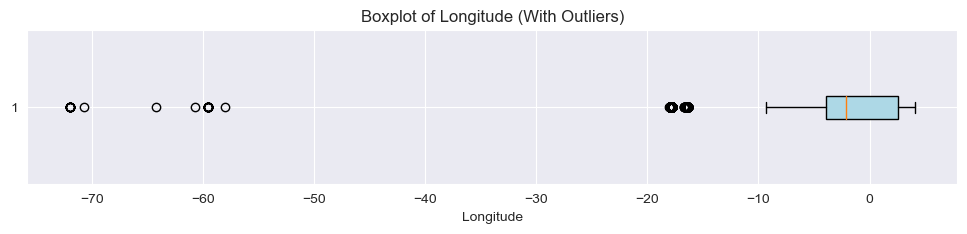

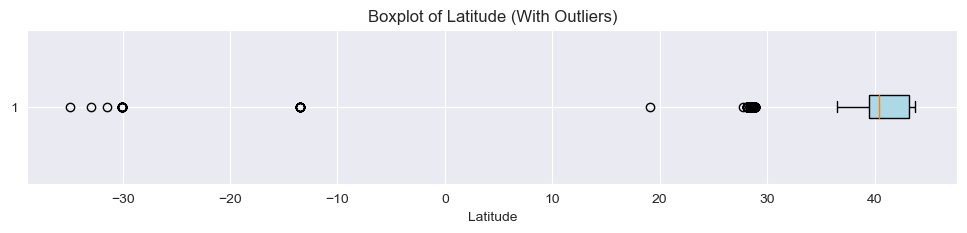

In [9]:
boxplot_view(processed_data,'longitude')
boxplot_view(processed_data,'latitude')

#### Remove Invalid Records

In [10]:
# Counting Invalid Records in longitude
outliers_longitude = processed_data[processed_data['longitude'] < -20.0]
count = outliers_longitude['longitude'].value_counts().sum()
print(f"The dataframe has {int(count)} longitude records out of range")

The dataframe has 37 longitude records out of range


In [11]:
# Remove records out of range (< -20.0)
processed_data = processed_data[processed_data['longitude'] >= -20]

In [12]:
# Verifying
print(f"Latitude: Min = {processed_data['latitude'].min()}, Max = {processed_data['latitude'].max()}")
print(f"Longitude: Min = {processed_data['longitude'].min()}, Max = {processed_data['longitude'].max()}")

Latitude: Min = 27.7254993, Max = 43.77288
Longitude: Min = -18.024301, Max = 4.109694208021556


#### Removing Regions with Insufficient Data

In [14]:
processed_data['region'].value_counts()

region
Islas Baleares          24123
País Vasco              23549
Galicia                  9792
Andalucía                6398
Castilla y León          6034
Castilla-La Mancha       6028
Comunidad de Madrid      5170
Cataluña                 4305
Comunidad Valenciana     3303
Canarias                 1185
Extremadura                 7
La Rioja                    5
Aragón                      3
Región de Murcia            2
Barcelona                   2
Gerona                      2
Gijón                       1
Navarra                     1
Piloña                      1
Name: count, dtype: int64

In [16]:
# Eliminate records
region_counts = processed_data['region'].value_counts()
regions_to_keep = region_counts[region_counts > 7].index
processed_data = processed_data[processed_data['region'].isin(regions_to_keep)]

# Verifying
processed_data['region'].value_counts()

region
Islas Baleares          24123
País Vasco              23549
Galicia                  9792
Andalucía                6398
Castilla y León          6034
Castilla-La Mancha       6028
Comunidad de Madrid      5170
Cataluña                 4305
Comunidad Valenciana     3303
Canarias                 1185
Name: count, dtype: int64

#### Filtering House Types

In this analysis, we are focused on studying family homes. Therefore, we will exclude housing types that do not meet this definition, such as rural homes or those with characteristics that do not align with the concept of a typical family residence.

Types of Housing to be Analyzed

- **Apartment**: A dwelling within a multi-unit building. Although it’s not a standalone house, it is a valid option for families seeking affordable housing in urban areas.
- **Single-Family Home**: The most classic example of a family home. It is a detached house meant for a single family. Another term for this is "Chalet"
- **Townhouse**: A single-family home that shares walls with other houses, but each unit is separate. It is common in urban and suburban areas.
- **Cottage** is typically a small house for families, often modest and traditional, featuring a rustic and functional design. They are commonly used as holiday homes.
- **Duplex**: In Spain, a duplex refers to a type of 'Single-Family Home' that has two floors connected by an internal staircase or an elevator. Another term for this is "Chalet Duplex".
- **Semi-Detached House**: Similar to a duplex, but designed to house two families in separate homes divided by a single shared wall.


In [17]:
processed_data['house_type'].value_counts()

house_type
Apartment              50777
Single-Family Home     19672
Townhouse               6123
Cottage                 3014
Farmhouse               2551
Duplex                  2537
Semi-Detached House     2463
Rural House             1611
Studio Apartment         800
Mansion                  128
Country House             98
Bungalow                  56
Ranch House               29
Tower House               19
Palace                     8
Castle                     1
Name: count, dtype: int64

In [18]:
house_types_to_exclude = ['Farmhouse', 'Rural House', 'Studio Apartment', 'Mansion', 'Country House', 'Bungalow', 'Ranch House', 'Tower House', 'Palace', 'Castle']
processed_data = processed_data[~processed_data['house_type'].isin(house_types_to_exclude)]
# Verifying
processed_data['house_type'].value_counts()

house_type
Apartment              50777
Single-Family Home     19672
Townhouse               6123
Cottage                 3014
Duplex                  2537
Semi-Detached House     2463
Name: count, dtype: int64

#### Group by price segments


The new variable `price_segment` is obtained by grouping properties into three price categories — **Affordable**, **Mid-Range**, and **Luxury**. This will allow for a better understanding of the differences within each segment, enable more specific analyses, and allow for a more focused treatment of outliers within each price range.

Price range for categorizing property prices:
- **Affordable**: For properties with accessible prices: up to €300,000.
- **Mid-Range**: For properties with moderate prices: from €300,000 to €700,000.
- **Luxury**: For properties with high prices: over €700,000.

In [19]:
# Ranges and labels
bins = [0, 300000, 700000, float('inf')]
labels = ['Affordable', 'Mid-Range', 'Luxury']

# Create the categorical variable
processed_data.loc[:, 'price_segment'] = pd.cut(processed_data['price'], bins=bins, labels=labels)

In [20]:
# Housing type information by price segment
count_df = processed_data.groupby(['price_segment', 'house_type'], observed=False).size().unstack(fill_value=0)
count_df

house_type,Apartment,Cottage,Duplex,Semi-Detached House,Single-Family Home,Townhouse
price_segment,,,,,,
Affordable,39887,2592,1607,1238,8079,4146
Mid-Range,8266,351,718,1044,6516,1692
Luxury,2624,71,212,181,5077,285


### Handling Outliers

#### room_num variable

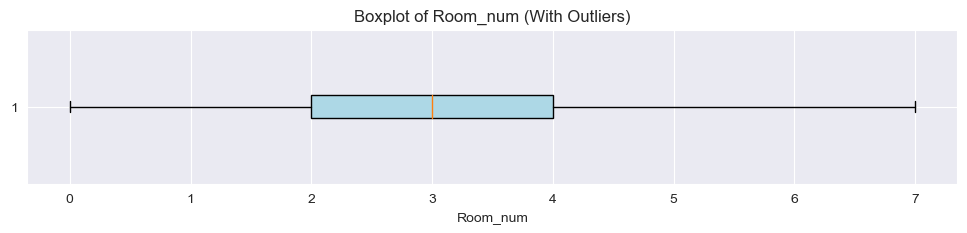

In [21]:
boxplot_view(processed_data, 'room_num')

In [23]:
processed_data['room_num'].value_counts().sort_index()

room_num
0      359
1     5074
2    18217
3    34219
4    16826
5     6615
6     2386
7      890
Name: count, dtype: int64

In [24]:
# Remove records where rooms is equal to 0.
processed_data = processed_data[processed_data['room_num'] != 0]

# Verifying
processed_data['room_num'].value_counts().sort_index()

room_num
1     5074
2    18217
3    34219
4    16826
5     6615
6     2386
7      890
Name: count, dtype: int64

#### bath_num variable

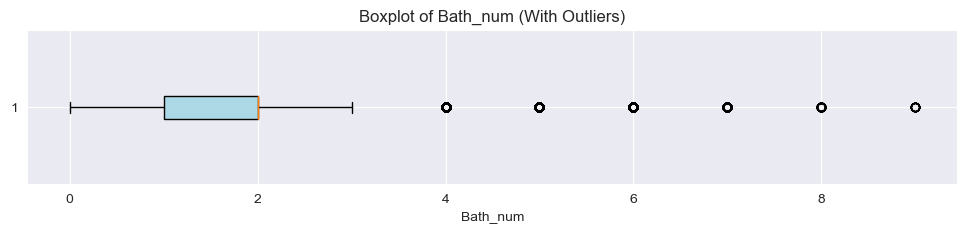

In [25]:
boxplot_view(processed_data, 'bath_num')

Discover in which price segments the outliers are located.

In [26]:
count_df = processed_data.groupby(['price_segment', 'bath_num'], observed=False).size().unstack(fill_value=0)
count_df

bath_num,0,1,2,3,4,5,6,7,8,9
price_segment,,,,,,,,,,
Affordable,144,28801,24051,3711,453,58,12,9,1,1
Mid-Range,5,2323,9138,5025,1626,355,70,8,4,1
Luxury,1,163,2109,2730,1966,952,366,99,36,9


Remove records with a value of 0.

In [28]:
processed_data = processed_data[processed_data['bath_num'] != 0]
processed_data['bath_num'].value_counts().sort_index()

bath_num
1    31287
2    35298
3    11466
4     4045
5     1365
6      448
7      116
8       41
9       11
Name: count, dtype: int64

#### m2_real variable

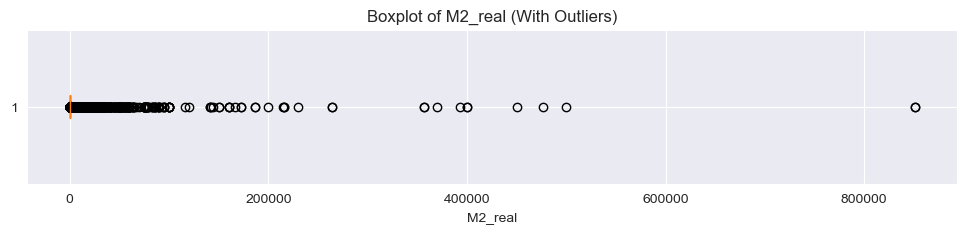

In [29]:
boxplot_view(processed_data, 'm2_real')

A highly skewed distribution is observed; it would be useful to categorize by square footage.

#### Property Size Classification by Square Footage

To provide a more accurate analysis, we classify properties into three size segments based on their actual square footage: Small, Medium, and Large.

The ranges used for each segment are as follows:

- **Small**: Up to 93 m², ideal for apartments, townhouses, or compact homes in urban areas.
- **Medium**: Between 93 m² and 232 m², commonly suitable for single-family homes in suburban areas.
- **Large**: More than 232 m², expansive properties with additional land.


In [30]:
# define ranges and labels
bins = [0, 93, 232, float('inf')]
labels = ['Small', 'Medium', 'Large']

# create new variable
processed_data['size_category'] = pd.cut(processed_data['m2_real'], bins=bins, labels=labels, right=False)

In [32]:
# Order the categories
processed_data['size_category'] = pd.Categorical(processed_data['size_category'], categories=['Small', 'Medium', 'Large'], ordered=True )

In [36]:
# verifying
print(processed_data['size_category'].cat.categories)
processed_data['size_category'].value_counts()

Index(['Small', 'Medium', 'Large'], dtype='object')


size_category
Medium    33451
Small     30364
Large     20262
Name: count, dtype: int64

#### Removing Outliers Using the IQR Criterion

In [37]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


def clean_outliers_by_segment(df, price_segment_column, house_type_column, region_column, column_to_clean):
    filtered_df = pd.DataFrame()  

    for segment in df[price_segment_column].unique():
        df_segment = df[df[price_segment_column] == segment]
        
        # Filtrar por house_type dentro de cada price_segment
        for house_type in df_segment[house_type_column].unique():
            df_house_type = df_segment[df_segment[house_type_column] == house_type]
            
            # Filtrar por region dentro de cada house_type y aplicar el filtro de outliers
            for region in df_house_type[region_column].unique():
                df_region = df_house_type[df_house_type[region_column] == region]
                
                # Aplicar la eliminación de outliers en la columna específica (e.g. m2_real)
                df_cleaned = remove_outliers(df_region, column_to_clean)
                
                # Concatenar los resultados
                filtered_df = pd.concat([filtered_df, df_cleaned])
    
    return filtered_df

In [38]:
spain_housing = clean_outliers_by_segment(processed_data, 'price_segment', 'house_type', 'region', 'm2_real')

In [39]:
# Verifying
spain_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
air_conditioner,78822.0,0.249461,0.432704,0.000000,0.000000,0.000000,0.000000,1.000000e+00
bath_num,78822.0,1.907361,0.965943,1.000000,1.000000,2.000000,2.000000,9.000000e+00
chimney,78822.0,0.014755,0.120570,0.000000,0.000000,0.000000,0.000000,1.000000e+00
garden,78822.0,0.266525,0.442144,0.000000,0.000000,0.000000,1.000000,1.000000e+00
m2_real,78822.0,264.227982,521.846337,1.000000,80.000000,106.000000,192.000000,2.700000e+04
price,78822.0,335772.774961,499053.293932,1.000000,120000.000000,199000.000000,362000.000000,2.000000e+07
room_num,78822.0,3.097257,1.143881,1.000000,2.000000,3.000000,4.000000,7.000000e+00
storage_room,78822.0,0.423194,0.494069,0.000000,0.000000,0.000000,1.000000,1.000000e+00
swimming_pool,78822.0,0.183895,0.387401,0.000000,0.000000,0.000000,0.000000,1.000000e+00
terrace,78822.0,0.486438,0.499819,0.000000,0.000000,0.000000,1.000000,1.000000e+00


Incoherent minimum values are observed in the price and m2_real variables after outliers were removed.

In [40]:
# Filtrar registros con al menos 20 m² y 10,000 euros
spain_housing = spain_housing[(spain_housing['m2_real'] >= 20) & (spain_housing['price'] >= 10000)]


In [41]:
spain_housing.describe()

,air_conditioner,bath_num,chimney,garden,m2_real,price,room_num,storage_room,swimming_pool,terrace,latitude,longitude,p_code
count,78726.000000,78726.000000,78726.000000,78726.000000,78726.000000,7.872600e+04,78726.000000,78726.000000,78726.000000,78726.000000,78726.000000,78726.000000,78726.000000
mean,0.249638,1.907591,0.014722,0.266646,264.471458,3.358165e+05,3.097452,0.423367,0.183993,0.486701,40.915513,-2.191316,20406.269288
std,0.432806,0.965711,0.120438,0.442209,522.108755,4.986391e+05,1.143468,0.494096,0.387481,0.499826,2.421005,4.054569,15501.911561
min,0.000000,1.000000,0.000000,0.000000,20.000000,1.000000e+04,1.000000,0.000000,0.000000,0.000000,27.725499,-18.024301,1001.000000
25%,0.000000,1.000000,0.000000,0.000000,80.000000,1.200000e+05,2.000000,0.000000,0.000000,0.000000,39.503938,-4.106933,7320.000000
50%,0.000000,2.000000,0.000000,0.000000,106.000000,1.990000e+05,3.000000,0.000000,0.000000,0.000000,40.943114,-2.294947,15880.000000
75%,0.000000,2.000000,0.000000,1.000000,192.000000,3.620000e+05,4.000000,1.000000,0.000000,1.000000,43.204407,2.489014,28041.000000
max,1.000000,9.000000,1.000000,1.000000,27000.000000,2.000000e+07,7.000000,1.000000,1.000000,1.000000,43.772880,4.109694,70712.000000


### Saving the dataframe ready for statistical analysis.

In [43]:
# spain_housing.to_csv('data/spain_housing.csv', index=False)
del spain_housing
gc.collect()

0

## Exploratory Data Analysis (EDA)

### General Overview

In [3]:
# Load the dataframe
spain_housing = pd.read_csv('data/spain_housing.csv')

In [4]:
# Filter by Affordable Segment
affordable = spain_housing[spain_housing['price_segment'] == 'Affordable']

In [5]:
# .T is used to display a large dataframe with many columns, making the data more readable.
affordable.head().T

,0,1,2,3,4
air_conditioner,0,0,0,1,1
bath_num,2,2,3,2,2
chimney,0,0,0,0,0
condition,Resale,Resale,Resale,Resale,Resale
garage,Not Included,Not Included,Not Included,Not Included,Not Included
garden,1,1,1,1,1
house_type,Single-Family Home,Single-Family Home,Single-Family Home,Single-Family Home,Single-Family Home
m2_real,275,200,250,267,112
price,242000.0,210000.0,270000.0,255000.0,175000.0
room_num,3,3,3,3,3


In [6]:
affordable.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54180 entries, 0 to 54179
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   air_conditioner  54180 non-null  int64  
 1   bath_num         54180 non-null  int64  
 2   chimney          54180 non-null  int64  
 3   condition        54180 non-null  object 
 4   garage           54180 non-null  object 
 5   garden           54180 non-null  int64  
 6   house_type       54180 non-null  object 
 7   m2_real          54180 non-null  int64  
 8   price            54180 non-null  float64
 9   room_num         54180 non-null  int64  
 10  storage_room     54180 non-null  int64  
 11  swimming_pool    54180 non-null  int64  
 12  terrace          54180 non-null  int64  
 13  latitude         54180 non-null  float64
 14  longitude        54180 non-null  float64
 15  address          54180 non-null  object 
 16  p_code           54180 non-null  int64  
 17  region           

In [7]:
affordable.describe()

,air_conditioner,bath_num,chimney,garden,m2_real,price,room_num,storage_room,swimming_pool,terrace,latitude,longitude,p_code
count,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000
mean,0.182521,1.566205,0.017165,0.178461,153.913086,152774.953784,2.831174,0.383389,0.100609,0.405851,40.916001,-2.965276,21678.790513
std,0.386277,0.657242,0.129887,0.382904,274.255950,71818.241015,1.006180,0.486216,0.300813,0.491060,2.517613,3.952764,15756.248985
min,0.000000,1.000000,0.000000,0.000000,20.000000,10000.000000,1.000000,0.000000,0.000000,0.000000,28.150957,-17.979523,1001.000000
25%,0.000000,1.000000,0.000000,0.000000,73.000000,95000.000000,2.000000,0.000000,0.000000,0.000000,39.441344,-5.748222,7609.000000
50%,0.000000,1.000000,0.000000,0.000000,92.000000,148000.000000,3.000000,0.000000,0.000000,0.000000,41.502219,-2.666671,17480.000000
75%,0.000000,2.000000,0.000000,0.000000,121.000000,205787.500000,3.000000,1.000000,0.000000,1.000000,43.153872,-1.091923,40005.000000
max,1.000000,9.000000,1.000000,1.000000,4000.000000,300000.000000,7.000000,1.000000,1.000000,1.000000,43.772023,4.109694,70712.000000


#### Distribution by House Types

In [8]:
affordable['house_type'].value_counts()

house_type
Apartment              38421
Single-Family Home      7028
Townhouse               3857
Cottage                 2185
Duplex                  1531
Semi-Detached House     1158
Name: count, dtype: int64

#### House Type Distributions by Regions

In [9]:
# Housing type information by price segment
count_df = affordable.groupby(['region', 'house_type'], observed=False).size().unstack(fill_value=0)
count_df

house_type,Apartment,Cottage,Duplex,Semi-Detached House,Single-Family Home,Townhouse
region,,,,,,
Andalucía,2035,409,135,362,1080,1211
Canarias,351,11,10,31,255,98
Castilla y León,3165,549,124,140,775,337
Castilla-La Mancha,3030,421,73,94,835,603
Cataluña,2168,52,142,62,530,209
Comunidad Valenciana,1717,66,32,38,576,224
Comunidad de Madrid,2947,1,86,3,6,20
Galicia,4567,228,308,211,1887,313
Islas Baleares,5699,346,177,123,699,576


#### Distributions of Binary Variables

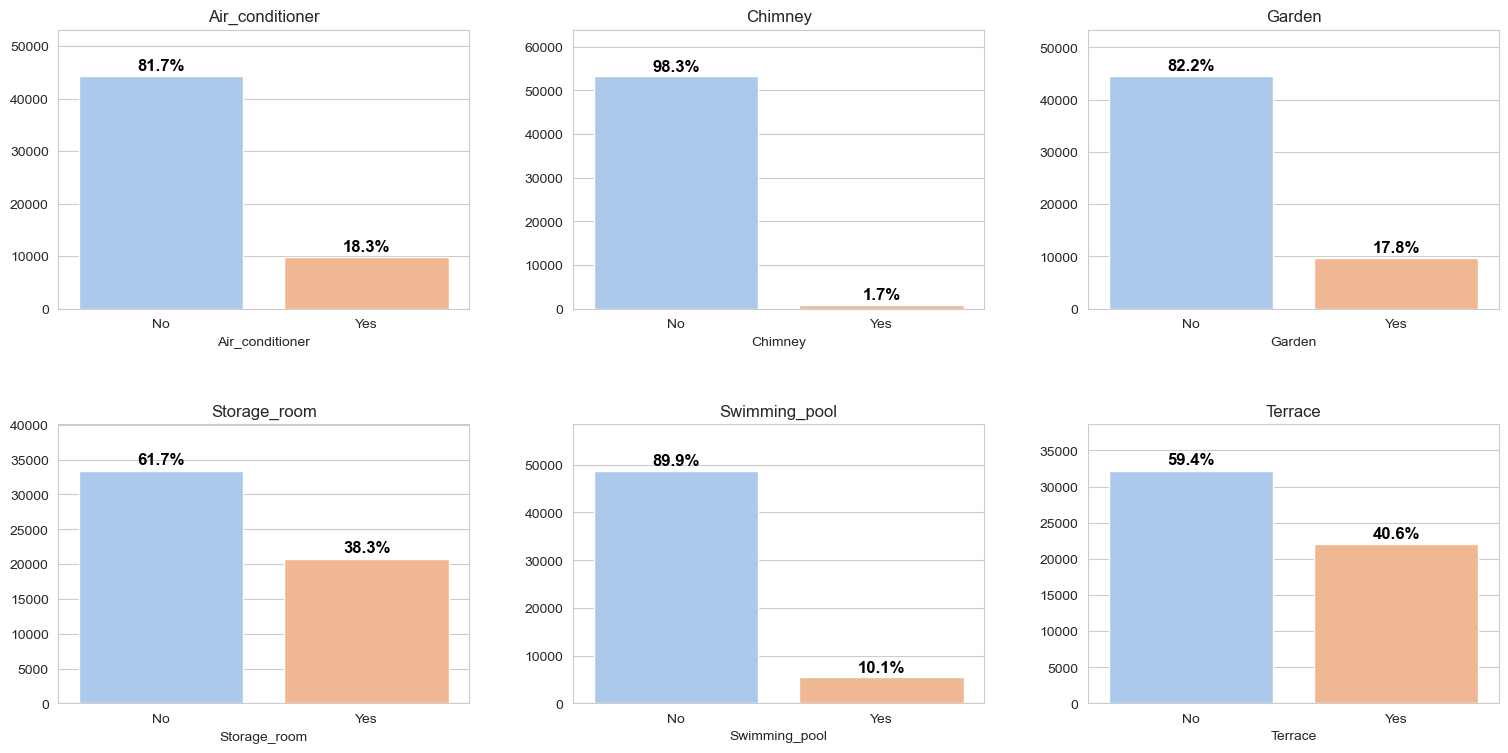

In [10]:
binary_categorical_view(affordable)

#### Distributions of Categorical Variables

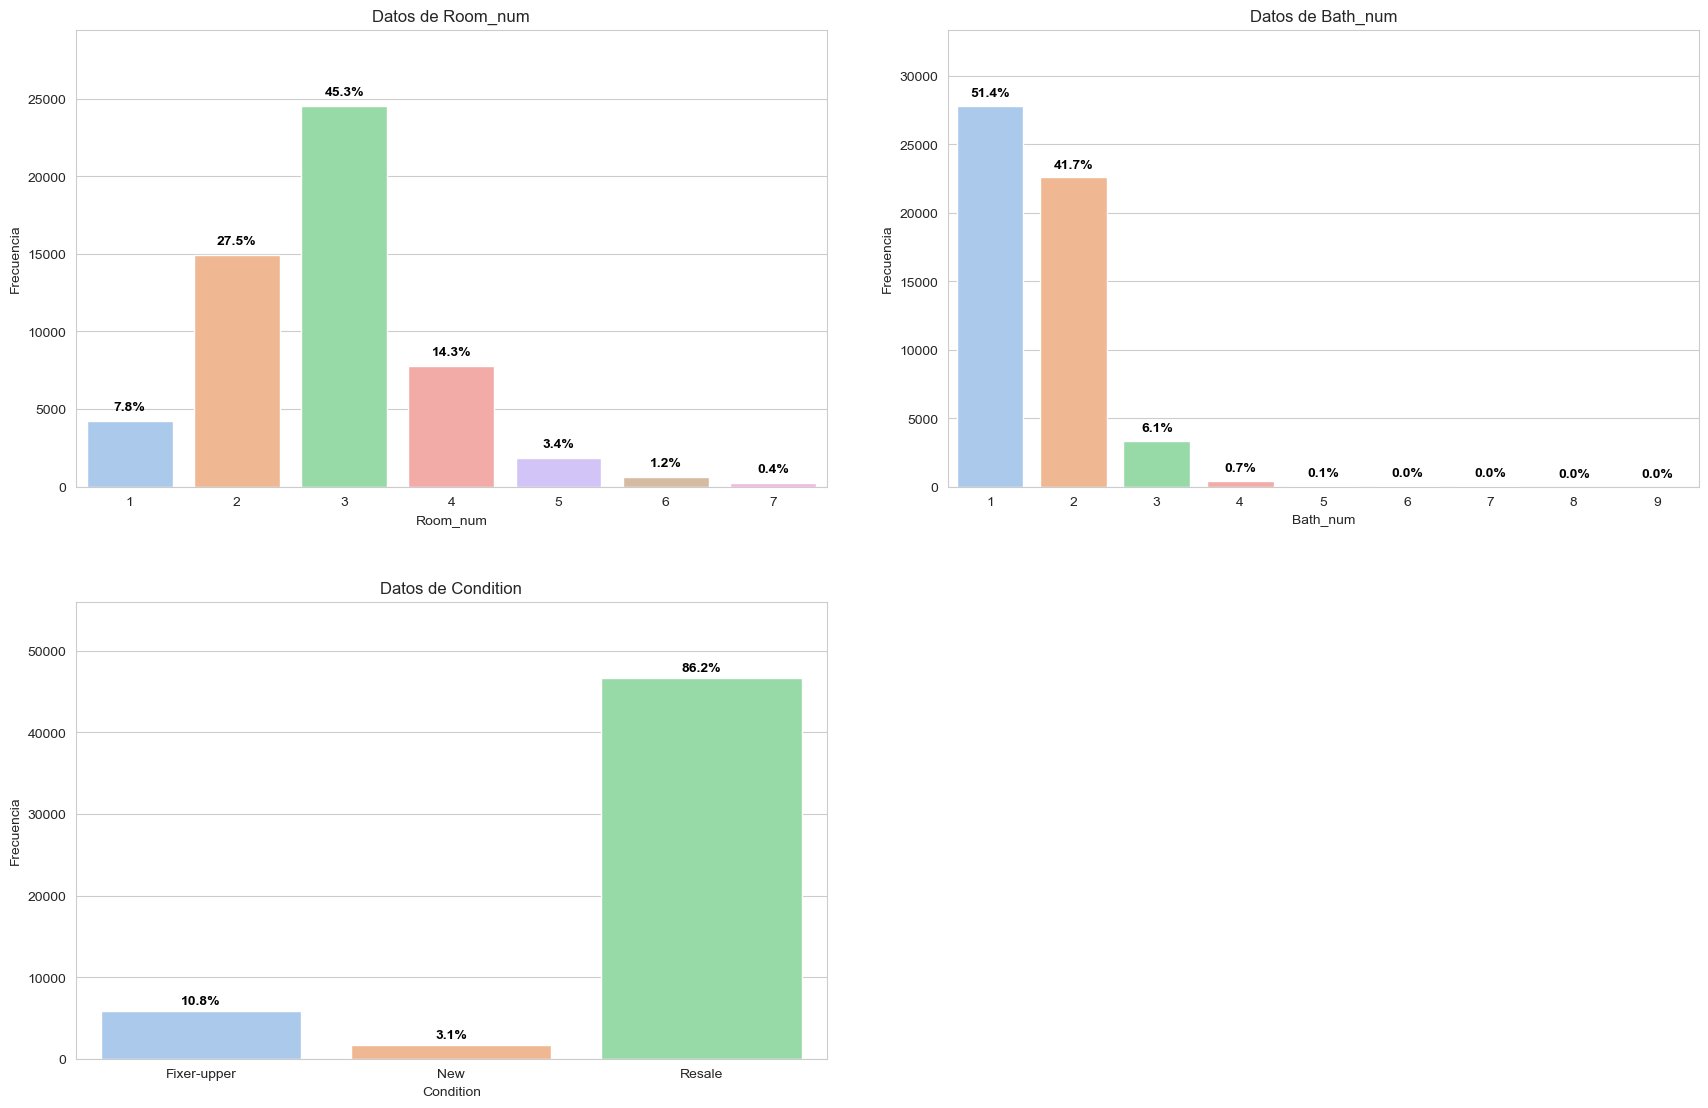

In [11]:
categorical_features_view(affordable)

#### Price Distribution

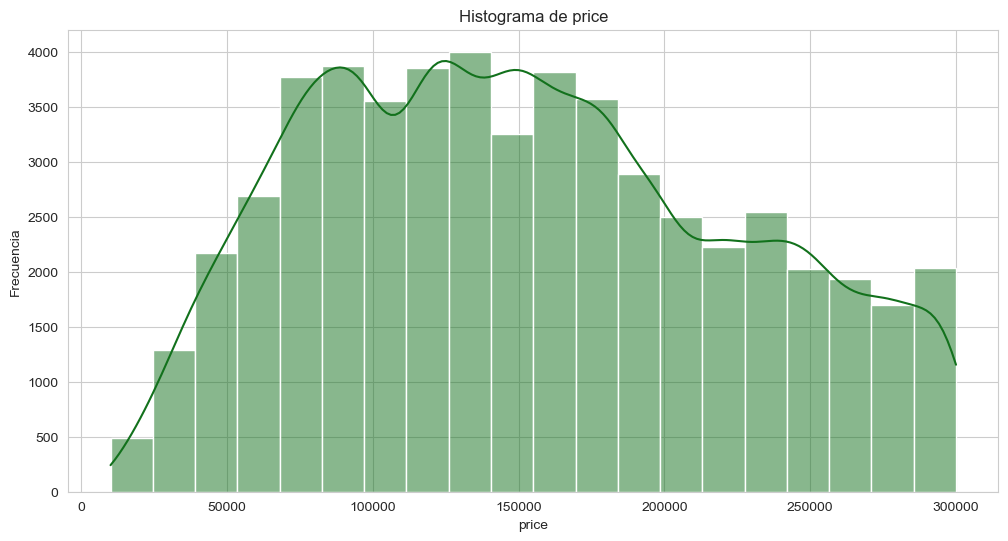

In [12]:
plot_histogram(affordable, 'price')

#### Square Meters Distribution

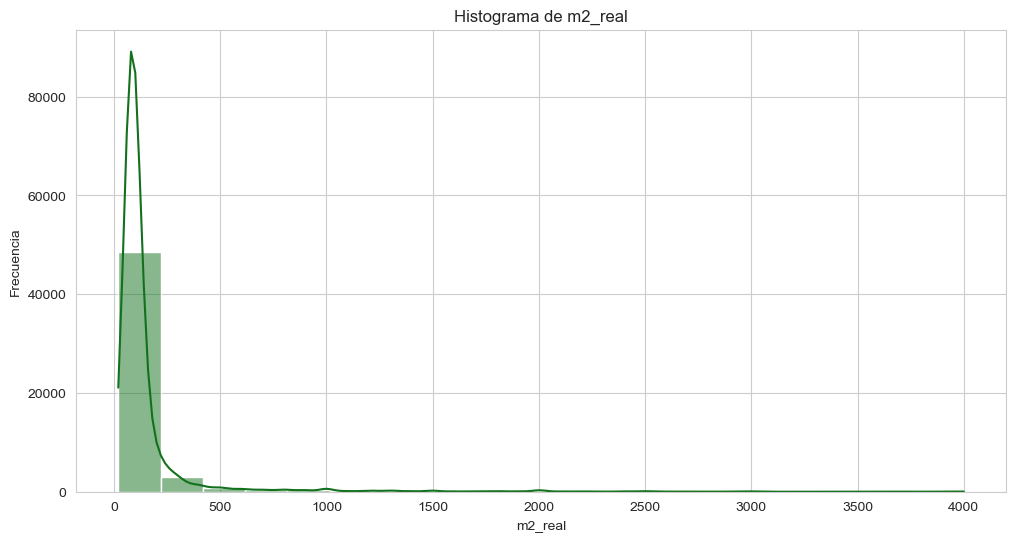

In [13]:
plot_histogram(affordable, 'm2_real')

Distribution by Size Category

In [14]:
affordable.groupby(['region', 'size_category'], observed=False).size().unstack(fill_value=0)

size_category,Large,Medium,Small
region,,,
Andalucía,626,2897,1709
Canarias,165,342,249
Castilla y León,632,2530,1928
Castilla-La Mancha,567,3158,1331
Cataluña,306,881,1976
Comunidad Valenciana,362,1507,784
Comunidad de Madrid,3,764,2296
Galicia,1772,2263,3479
Islas Baleares,392,3637,3591


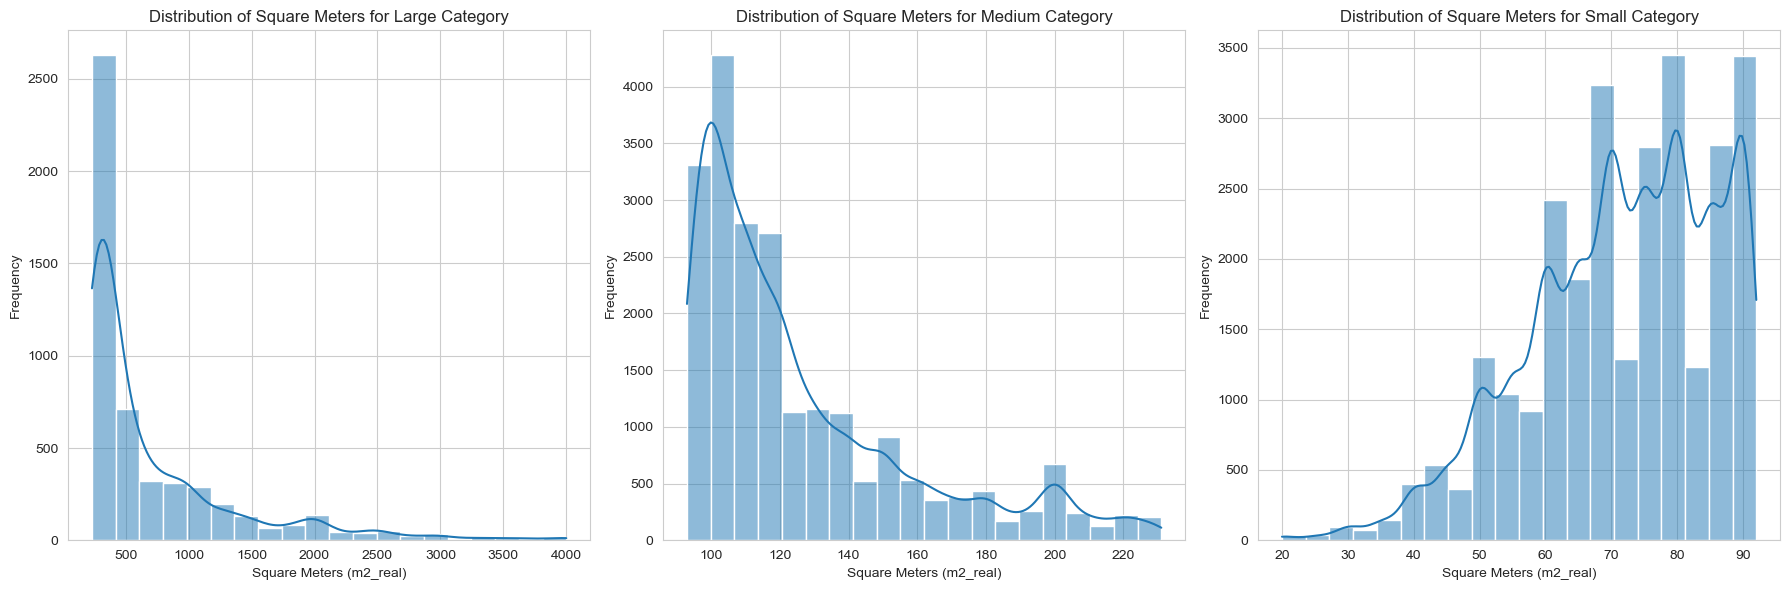

In [15]:
categories = affordable['size_category'].unique()
plt.figure(figsize=(18, 6))

for i, category in enumerate(categories, 1):
    plt.subplot(1, len(categories), i)
    sns.histplot(affordable[affordable['size_category'] == category]['m2_real'], bins=20, kde=True)
    plt.title(f'Distribution of Square Meters for {category} Category')
    plt.xlabel('Square Meters (m2_real)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()